# TFIDF
## reference: https://www.kaggle.com/slatawa/tfidf-implementation-to-get-80-accuracy
### Term Frequency - Inverse Document Frequency
정보 검색과 텍스트 마이닝에서 이용하는 가중치로, 여러 문서로 이루어진 문서군이 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치이다. 문서의 핵심어를 추출하거나, 검색 엔진에서 검색 결과의 순위를 결정하거나, 문서들 사이의 비슷한 정도를 구하는 등의 용도로 사용할 수 있다.

## 1) TF(단어 빈도, term frequency)
    특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값. 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다. 
## 2) DF(문서 빈도, document frequency)
    단어 자체가 문서군 내에서 자주 사용 되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다.
## 3) IDF(역문서 빈도, inverse document frequency)
    DF의 역수. TF-IDF는 TF와 IDF를 곱한 값!!.

IDF 값은 문서군의 성격에 따라 결정된다. 예를 들어 '원자'라는 낱말은 일반적인 문서들 사이에서는 잘 나오지 않기 때문에 IDF 값이 높아지고 문서의 핵심어가 될 수 있지만, 원자에 대한 문서를 모아놓은 문서군의 경우 이 낱말은 상투어가 되어 각 문서들을 세분화하여 구분할 수 있는 다른 낱말들이 높은 가중치를 얻게 된다.

# 1. Loading dataset

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('TFIDFInput'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.width',1000000)
pd.set_option('display.max_columns', 500)

score_df = pd.DataFrame(columns={'Model Description','Score'})
score_df_added = pd.DataFrame(columns={'Model Description','Score'})
# Any results you write to the current directory are saved as output.

df_train = pd.read_csv("TFIDFInput/train.csv")
df_test = pd.read_csv("TFIDFInput/test.csv")
df_train_added = pd.read_csv("TFIDFInput/train_added.csv", encoding = 'CP949')


TFIDFInput/train_added.csv
TFIDFInput/train.csv
TFIDFInput/sample_submission.csv
TFIDFInput/test.csv


# 2. Check data

In [20]:
print(df_train.head(5))
print(df_train.info())
print("#######################################################")
print(df_train.isnull().any())
print(df_test.isnull().any)

   id keyword location                                               text  target
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
#######################################################
id          False
keywo

In [21]:
print(df_train.shape)
print(df_test.shape)

(7613, 5)
(3263, 4)


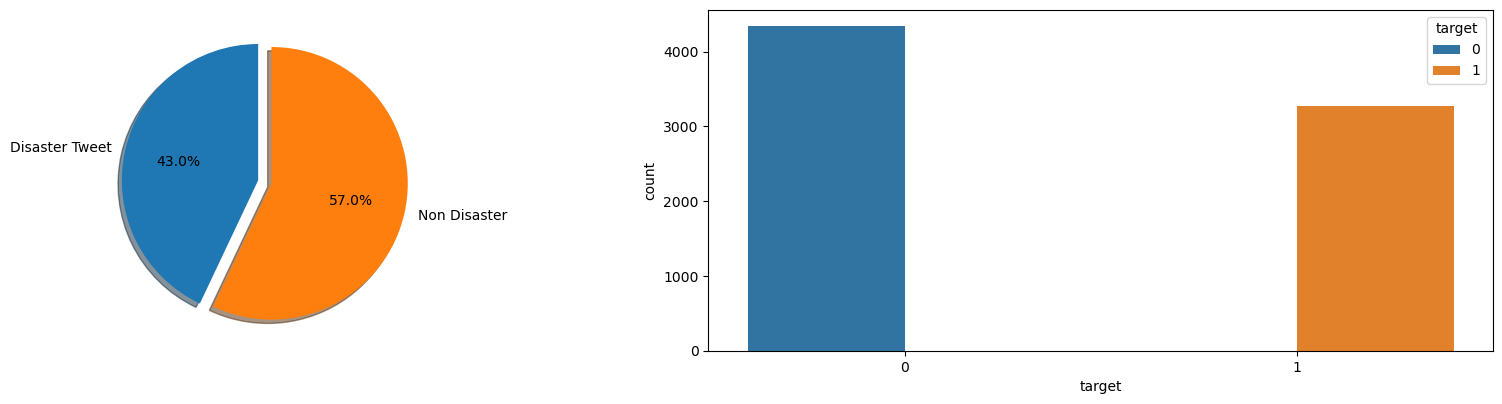

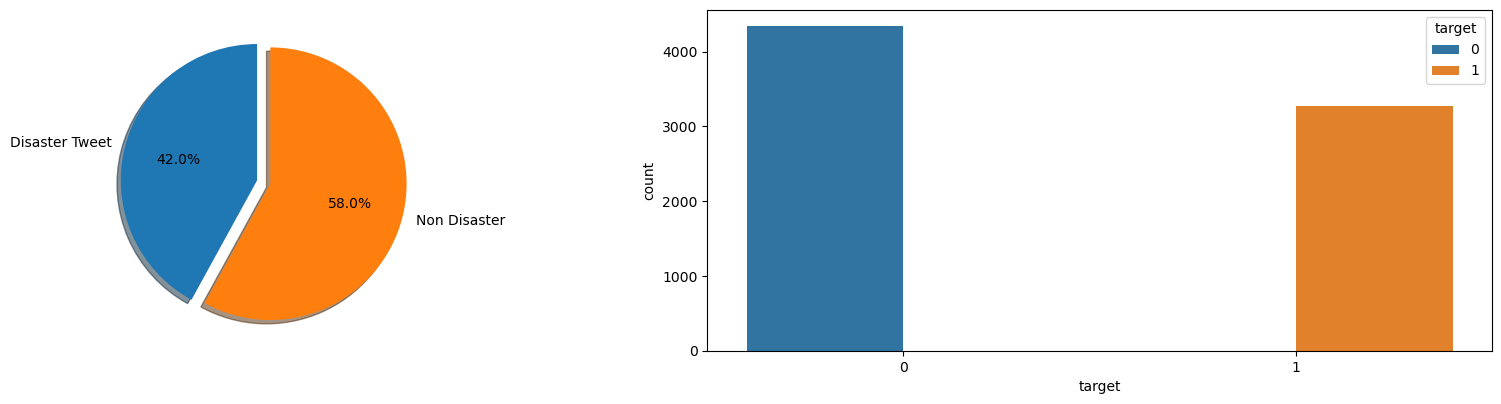

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

labels=['Disaster Tweet','Non Disaster']
size=  [df_train['target'].mean()*100,abs(1-df_train['target'].mean())*100]
explode = (0, 0.1)
#ig1,ax1 = plt.subplots()
axes[0].pie(size,labels=labels,explode=explode,shadow=True,
            startangle=90,autopct='%1.1f%%')
sns.countplot(x=df_train['target'], hue=df_train['target'], ax=axes[1])

##################################################################################

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

labels=['Disaster Tweet','Non Disaster']
size=  [df_train_added['target'].mean()*100,abs(1-df_train['target'].mean())*100]
explode = (0, 0.1)
#ig1,ax1 = plt.subplots()
axes[0].pie(size,labels=labels,explode=explode,shadow=True,
            startangle=90,autopct='%1.1f%%')
sns.countplot(x=df_train['target'], hue=df_train['target'], ax=axes[1])


plt.show()

## Get a baseline model driven off just the tweet Text and TFIDF transformer.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

X_train,X_test,y_train,y_test = train_test_split(df_train['text'],df_train['target'])
vector = TfidfVectorizer().fit(X_train)

#print(vector.get_feature_names())
X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

model = LogisticRegression().fit(X_train_vector,y_train)
print('Logistic Regression ROC Auc Score with TFIDF - %3f'%(roc_auc_score(y_test,model.predict(X_test_vector))))
print('F1Score - %3f'%(f1_score(y_test,model.predict(X_test_vector))))
score_df = score_df.append({'Model Description':'Basic LR Model - Basline - TFIDF',
                           'Score':roc_auc_score(y_test,model.predict(X_test_vector))}
                           ,ignore_index=True)

####### Now let's try with count vectorizer

cv_vector = CountVectorizer().fit(X_train)
X_train_vector = cv_vector.transform(X_train)
X_test_vector = cv_vector.transform(X_test)

model = LogisticRegression().fit(X_train_vector,y_train)
predict = model.predict(X_test_vector)
score = roc_auc_score(y_test,predict)
print('Logistic Regression Roc AUC Score with countvectorizer - %3f'%score)

score_df = score_df.append({'Model Description':'Basic LR Model - Basline - CV',
                          'Score':score}
                          ,ignore_index=True)

#########################################################################################################

print("\n#####Result with more dataset#####")
Xadd_train,Xadd_test,yadd_train,yadd_test = train_test_split(df_train_added['text'],df_train_added['target'])
vector = TfidfVectorizer().fit(Xadd_train)

#print(vector.get_feature_names())
Xadd_train_vector = vector.transform(Xadd_train)
Xadd_test_vector = vector.transform(Xadd_test)

model_added = LogisticRegression().fit(Xadd_train_vector,yadd_train)
print('Logistic Regression ROC Auc Score with TFIDF - %3f'%(roc_auc_score(yadd_test,model_added.predict(Xadd_test_vector))))
print('F1Score - %3f'%(f1_score(yadd_test,model_added.predict(Xadd_test_vector))))
score_df_added = score_df_added.append({'Model Description':'Basic LR Model - Basline - TFIDF',
                           'Score':roc_auc_score(yadd_test,model_added.predict(Xadd_test_vector))}
                           ,ignore_index=True)

####### Now let's try with count vectorizer

cv_vector_added = CountVectorizer().fit(Xadd_train)
Xadd_train_vector = cv_vector_added.transform(Xadd_train)
Xadd_test_vector = cv_vector_added.transform(Xadd_test)

model_added = LogisticRegression().fit(Xadd_train_vector,yadd_train)
predict = model_added.predict(Xadd_test_vector)
score_added = roc_auc_score(yadd_test,predict)
print('Logistic Regression Roc AUC Score with countvectorizer - %3f'%score_added)

score_df_added = score_df_added.append({'Model Description':'Basic LR Model - Basline - CV',
                          'Score':score}
                          ,ignore_index=True)


Logistic Regression ROC Auc Score with TFIDF - 0.785842
F1Score - 0.747860
Logistic Regression Roc AUC Score with countvectorizer - 0.779716

#####Result with more dataset#####
Logistic Regression ROC Auc Score with TFIDF - 0.791919
F1Score - 0.753133
Logistic Regression Roc AUC Score with countvectorizer - 0.776712


# 3. Clean Data

### So we have a baseline score of 79% to work with , let's get to clean data and see if we can improve the score

### As first step in cleaning - let us replace some commonly occuring shorthands

In [29]:
def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"i'll", "i will", text)
    text = re.sub(r"she'll", "she will", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"here's", "here is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"   ", " ", text) # Remove any extra spaces
    return text


df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)

df_train_added['clean_text'] = df_train_added['text'].apply(clean_text)

### 1) Let us remove any characters other then alphabets
### 2) Convert all dictionary to lower case - for consistency
### 3) Lemmatize (원형 추출)

####  store this text in a seperate column as we want to keep the orignal text in case we want to do some feature engineering down the line.

In [30]:
def massage_text(text):
    import re
    from nltk.corpus import stopwords
    ## remove anything other then characters and put everything in lowercase
    tweet = re.sub("[^a-zA-Z]", ' ', text)
    tweet = tweet.lower()
    tweet = tweet.split()

    from nltk.stem import WordNetLemmatizer
    lem = WordNetLemmatizer()
    tweet = [lem.lemmatize(word) for word in tweet
             if word not in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    return tweet
    print('--here goes nothing')
    print(text)
    print(tweet)

df_train['clean_text'] = df_train['text'].apply(massage_text)
df_test['clean_text'] = df_test['text'].apply(massage_text)

df_train_added['clean_text'] = df_train['text'].apply(massage_text)



LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/ec2-user/nltk_data'
    - '/home/ec2-user/anaconda3/envs/pytorch_p36/nltk_data'
    - '/home/ec2-user/anaconda3/envs/pytorch_p36/share/nltk_data'
    - '/home/ec2-user/anaconda3/envs/pytorch_p36/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


####    Let's take a look at the data now

In [38]:
df_train.iloc[0:10][['text','clean_text']]

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby #alaska as ...
5,#RockyFire Update => California Hwy. 20 closed...,#rockyfire update => california hwy. 20 closed...
6,#flood #disaster Heavy rain causes flash flood...,#flood #disaster heavy rain causes flash flood...
7,I'm on top of the hill and I can see a fire in...,i am on top of the hill and i can see a fire i...
8,There's an emergency evacuation happening now ...,there is an emergency evacuation happening now...
9,I'm afraid that the tornado is coming to our a...,i am afraid that the tornado is coming to our ...


In [39]:
df_train_added.iloc[-10:-1][['text','clean_text']]

,text,clean_text
8003,Nuclear the SAFEST most RELIABLE energy source...,nuclear the safest most reliable energy source...
8004,Share Tokyo2020 will be held on the irradiated...,share tokyo2020 will be held on the irradiated...
8005,Hedge funds snap up Uranium in bet on GreenEne...,hedge funds snap up uranium in bet on greenene...
8006,Led by France 10x EU countries call on Brussel...,led by france 10x eu countries call on brussel...
8007,France bets on more Nuclear power in face of E...,france bets on more nuclear power in face of e...
8008,guardian Go nuclear and solar,guardian go nuclear and solar
8009,It is beginning nuclear,it is beginning nuclear
8010,GB Grid Nuclear is generating 397GW 1759 out o...,gb grid nuclear is generating 397gw 1759 out o...
8011,Taiwan separatists are US puppets USA built th...,taiwan separatists are us puppets usa built th...


# 4. Creation of more Models

### 4.1 Start by creating a Logistic Regression model again , this time we will use Grid Seach for hyper-parameter optimization

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

vector = TfidfVectorizer().fit(df_train['clean_text'])
df_train_vector = vector.transform(df_train['clean_text'])
df_test_vector = vector.transform(df_test['clean_text'])

lr_model = LogisticRegression()
grid_values =  {'penalty':['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
grid_search_model = GridSearchCV(lr_model,param_grid=grid_values,cv=3)
grid_search_model.fit(df_train_vector,df_train['target'])

print(grid_search_model.best_estimator_)
print(grid_search_model.best_score_)
print(grid_search_model.best_params_)

## dumping the output to a file 
predict_df = pd.DataFrame()
predict = grid_search_model.predict(df_test_vector)
predict_df['id'] = df_test['id']
predict_df['target'] = predict
predict_df.to_csv('sample_submission_2.csv', index=False)
score_df = score_df.append({'Model Description':'LR Model - with data cleaning and Grid Search',
                           'Score':grid_search_model.best_score_}
                           ,ignore_index=True)


### let's have another model with some ngram's though 
X_train,X_test,y_train,y_test = train_test_split(df_train['clean_text'],df_train['target'])
vector = TfidfVectorizer(ngram_range=(1,3)).fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

lr_model = LogisticRegression(C=1,penalty='l2').fit(X_train_vector,y_train)
predict = lr_model.predict(X_test_vector)
score = roc_auc_score(y_test,predict)
print('Roc AUC curve for LR and TFIDF with ngrams  - %3f'%score)

score_df = score_df.append({'Model Description':'LR Model - with ngram range',
                           'Score':score}
                           ,ignore_index=True)

##################################################################################################

vector2 = TfidfVectorizer().fit(df_train_added['clean_text'])
df_train_vector2 = vector.transform(df_train_added['clean_text'])
df_test_vector2 = vector.transform(df_test['clean_text'])

lr_model2 = LogisticRegression()
grid_values2 =  {'penalty':['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
grid_search_model2 = GridSearchCV(lr_model,param_grid=grid_values,cv=3)
grid_search_model2.fit(df_train_vector2,df_train_added['target'])

print(grid_search_model2.best_estimator_)
print(grid_search_model2.best_score_)
print(grid_search_model2.best_params_)

## dumping the output to a file 
predict_df_added = pd.DataFrame()
predict_added  = grid_search_model2.predict(df_test_vector2)
predict_df_added['id'] = df_test['id']
predict_df_added['target'] = predict_added 
predict_df_added.to_csv('sample_submission_2.csv', index=False)
score_df_added = score_df_added .append({'Model Description':'LR Model - with data cleaning and Grid Search',
                           'Score':grid_search_model2.best_score_}
                           ,ignore_index=True)

### let's have another model with some ngram's though 
X_train,X_test,y_train,y_test = train_test_split(df_train_added['clean_text'],df_train_added['target'])
vector = TfidfVectorizer(ngram_range=(1,3)).fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

lr_model2 = LogisticRegression(C=1,penalty='l2').fit(X_train_vector,y_train)
predict_added = lr_model2.predict(X_test_vector)
score = roc_auc_score(y_test,predict_added )
print('Roc AUC curve for LR and TFIDF with ngrams  - %3f'%score)

score_df_added  = score_df_added .append({'Model Description':'LR Model - with ngram range',
                           'Score':score}
                           ,ignore_index=True)

LogisticRegression(C=1)
0.7375574877678496
{'C': 1, 'penalty': 'l2'}
Roc AUC curve for LR and TFIDF with ngrams  - 0.775057
LogisticRegression(C=10)
0.718207912142768
{'C': 10, 'penalty': 'l2'}
Roc AUC curve for LR and TFIDF with ngrams  - 0.752092


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### let's have another model with some ngram's though 
X_train,X_test,y_train,y_test = train_test_split(df_train['clean_text'],df_train['target'])
vector = TfidfVectorizer(ngram_range=(1,3)).fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

lr_model = LogisticRegression(C=1,penalty='l2').fit(X_train_vector,y_train)
predict = lr_model.predict(X_test_vector)
score = roc_auc_score(y_test,predict)
print('Roc AUC curve for LR and TFIDF with ngrams  - %3f'%score)

score_df = score_df.append({'Model Description':'LR Model - with ngram range',
                           'Score':grid_search_model.score}
                           ,ignore_index=True)

vector = TfidfVectorizer(ngram_range=(1,3)).fit(df_train['clean_text'])
X_train_vector = vector.transform(df_train['clean_text'])
X_test_vector = vector.transform(df_test['clean_text'])
lr_model = LogisticRegression(C=1,penalty='l2').fit(X_train_vector,df_train['target'])
predict = lr_model.predict(X_test_vector)


## dumping the output to a file 
predict_df = pd.DataFrame()
predict_df['id'] = df_test['id']
predict_df['target'] = predict
predict_df.to_csv('sample_submission_001.csv', index=False)

###########################################################################################

### let's have another model with some ngram's though 
X_train,X_test,y_train,y_test = train_test_split(df_train_added['clean_text'],df_train_added['target'])
vector = TfidfVectorizer(ngram_range=(1,3)).fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

lr_model = LogisticRegression(C=1,penalty='l2').fit(X_train_vector,y_train)
predict = lr_model.predict(X_test_vector)
score = roc_auc_score(y_test,predict)
print('Roc AUC curve for LR and TFIDF with ngrams  - %3f'%score)

score_df = score_df.append({'Model Description':'LR Model - with ngram range',
                           'Score':grid_search_model.score}
                           ,ignore_index=True)

vector = TfidfVectorizer(ngram_range=(1,3)).fit(df_train['clean_text'])
X_train_vector = vector.transform(df_train['clean_text'])
X_test_vector = vector.transform(df_test['clean_text'])
lr_model = LogisticRegression(C=1,penalty='l2').fit(X_train_vector,df_train['target'])
predict = lr_model.predict(X_test_vector)


## dumping the output to a file 
predict_df_added = pd.DataFrame()
predict_df_added['id'] = df_test['id']
predict_df_added['target'] = predict
predict_df_added.to_csv('sample_submission_001.csv', index=False)

Roc AUC curve for LR and TFIDF with ngrams  - 0.760193
Roc AUC curve for LR and TFIDF with ngrams  - 0.762850


In [47]:
pd.concat([df_test,predict_df['target']],axis=1)
pd.concat([df_test,predict_df_added['target']],axis=1)

### you could dump this in a csv and do further analysis to check what
### misclassifications are there manually ,observations could then be used 
### to further tweak stuff


,id,keyword,location,text,clean_text,target
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting. #spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan,1
...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles ûò safety faste...,1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm in ri worse than last hurricane. my city...,0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment in chicago http://t.co/u...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issues hazardous weather outlook (hwo) htt...,1


### 4.2 Let's apply Gaussian NB to the data

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = \
        train_test_split(df_train['clean_text'], df_train['target'], random_state=20)
## Apply Tfidf tranformation
vector = TfidfVectorizer().fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector  = vector.transform(X_test)
df_test_vector = vector.transform(df_test['clean_text'])

gb_model= GaussianNB().fit(X_train_vector.todense(),y_train)
predict = gb_model.predict(X_test_vector.todense())

print('Roc AUC score - %3f'%(roc_auc_score(y_test,predict)))
score_df = score_df.append({'Model Description':'Naive Bayes',
                           'Score':roc_auc_score(y_test,predict)}
                           ,ignore_index=True)

####################################################################################################

X_train, X_test, y_train, y_test = \
        train_test_split(df_train_added['clean_text'], df_train_added['target'], random_state=20)
## Apply Tfidf tranformation
vector = TfidfVectorizer().fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector  = vector.transform(X_test)
df_test_vector = vector.transform(df_test['clean_text'])

gb_model= GaussianNB().fit(X_train_vector.todense(),y_train)
predict = gb_model.predict(X_test_vector.todense())

print('Roc AUC score - %3f'%(roc_auc_score(y_test,predict)))
score_df = score_df.append({'Model Description':'Naive Bayes',
                           'Score':roc_auc_score(y_test,predict)}
                           ,ignore_index=True)

Roc AUC score - 0.643531
Roc AUC score - 0.635056


### 4.3 Support Vector Classifier - with Grid search to Optimize parameters

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

vector = TfidfVectorizer().fit(df_train['clean_text'])
df_train_vector = vector.transform(df_train['clean_text'])
df_test_vector = vector.transform(df_test['clean_text'])

svc_model = SVC()
grid_values={'kernel':['linear', 'poly', 'rbf'],'C':[0.001,0.01,1,10]}
grid_search_model= GridSearchCV(svc_model,param_grid=grid_values,cv=3)
grid_search_model.fit(df_train_vector,df_train['target'])

print(grid_search_model.best_estimator_)
print(grid_search_model.best_score_)
print(grid_search_model.best_params_)

score_df = score_df.append({'Model Description':'SVC - with Grid Search',
                           'Score':grid_search_model.best_score_}
                           ,ignore_index=True)

predict = grid_search_model.predict(df_test_vector)
predict_df = pd.DataFrame()
predict_df['id'] = df_test['id']
predict_df['target'] = predict

# # print(predict_df.head(5))
predict_df.to_csv('sample_submission_4.csv', index=False)

#################################################################################

vector = TfidfVectorizer().fit(df_train_added['clean_text'])
df_train_vector = vector.transform(df_train_added['clean_text'])
df_test_vector = vector.transform(df_test['clean_text'])

svc_model = SVC()
grid_values={'kernel':['linear', 'poly', 'rbf'],'C':[0.001,0.01,1,10]}
grid_search_model= GridSearchCV(svc_model,param_grid=grid_values,cv=3)
grid_search_model.fit(df_train_vector,df_train_added['target'])

print(grid_search_model.best_estimator_)
print(grid_search_model.best_score_)
print(grid_search_model.best_params_)

score_df = score_df.append({'Model Description':'SVC - with Grid Search',
                           'Score':grid_search_model.best_score_}
                           ,ignore_index=True)

predict = grid_search_model.predict(df_test_vector)
predict_df = pd.DataFrame()
predict_df['id'] = df_test['id']
predict_df['target'] = predict

# # print(predict_df.head(5))
predict_df.to_csv('sample_submission_4.csv', index=False)

SVC(C=1, kernel='linear')
0.734798530475001
{'C': 1, 'kernel': 'linear'}
SVC(C=10)
0.7371770872332459
{'C': 10, 'kernel': 'rbf'}


# Let's look at score_df which has scores of all models till now and let's sort the output in ascending based on the Score

In [53]:
score_df[['Model Description','Score']]

,Model Description,Score
0,Basic LR Model - Basline - TFIDF,0.791088
1,Basic LR Model - Basline - CV,0.788663
2,Basic LR Model - Basline - TFIDF,0.766493
3,Basic LR Model - Basline - CV,0.771295
4,Basic LR Model - Basline - TFIDF,0.792324
5,Basic LR Model - Basline - CV,0.783362
6,Basic LR Model - Basline - TFIDF,0.786748
7,Basic LR Model - Basline - CV,0.780899
8,Basic LR Model - Basline - TFIDF,0.785842
9,Basic LR Model - Basline - CV,0.779716


In [54]:
score_df_added[['Model Description','Score']]

,Model Description,Score
0,Basic LR Model - Basline - TFIDF,0.782121
1,Basic LR Model - Basline - CV,0.788663
2,Basic LR Model - Basline - TFIDF,0.781830
3,Basic LR Model - Basline - CV,0.771295
4,Basic LR Model - Basline - TFIDF,0.786969
5,Basic LR Model - Basline - CV,0.783362
6,Basic LR Model - Basline - TFIDF,0.791919
7,Basic LR Model - Basline - CV,0.779716
8,LR Model - with data cleaning and Grid Search,0.718208
9,LR Model - with ngram range,0.752092
